In [1]:
# 1. 데이터 준비
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() # Bunch라는 클래스 타입
print(data.keys())

print("타겟이름 ", data["target_names"])
print("특성이름 ", data["feature_names"])
print("파일명 ", data["filename"])
print("데이터설명")
print(data["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
타겟이름  ['malignant' 'benign']
특성이름  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
파일명  breast_cancer.csv
데이터설명
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:


In [15]:
# 2. 데이터를 나누기
X = data["data"]   # ndarray 2차원 배열
y = data["target"] # ndarray 1차원 배열

print(X[:10])
print(y)

# 데이터를 랜덤하게 섞어서 70% 추출, train_test_split: 데이터를 랜덤하게 섞어서 나눠준다
from sklearn.model_selection import train_test_split

# tuple로 반환, random_state 인자가 시드역할, 계속 같은 데이터를 내보내고 싶으면 이 값을 고정해야 한다.
# test_size=0.3  그 비율대로 나뉜다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.4)
print(X_train.shape)
print(X_test.shape)

# 데이터 전체를 확인하기 위해서, 산점행렬(특성이 4개면 각 특성대 특성으로만 그릴 수 있어서 차트 4X4=16개,
# 특성이 10개가 되면 10X10=100개 차트가 만들어진다.)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

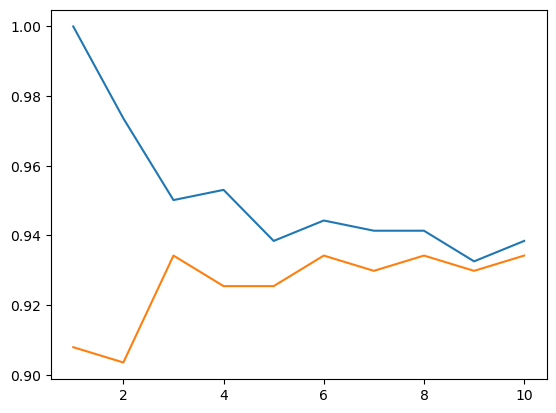

In [16]:
# 3. 알고리즘 선택
from sklearn.neighbors import KNeighborsClassifier

# 적당한 하이퍼파라미터를 골라보자
n_neighbors = 10 # 적당히
trainscoreList = list()
testscoreList = list()

for i in range(1, n_neighbors+1):
    model = KNeighborsClassifier(n_neighbors=i) # 이웃의 개수 3개
    model.fit(X_train, y_train)
    # 5. 성능 평가하기
    score1 = model.score(X_train, y_train)
    score2 = model.score(X_test, y_test)
    trainscoreList.append(score1)
    testscoreList.append(score2)

import matplotlib.pyplot as plt
# x축, y축
plt.plot(range(1, len(trainscoreList)+1), trainscoreList, label="train")
plt.plot(range(1, len(testscoreList)+1), testscoreList, label="test")
plt.show()

In [17]:
# 4. 예측하기
y_pred = model.predict(X_test) # 테스트셋으로 예측한 데이터를 반환한다.

# 본래의 테스트셋인 y_test와 비교해본다
print(y_pred)
print(y_test)

# 클래스이름으로 출력
class_names = list(data["target_names"])
for i, j in zip(y_pred, y_test):
    print("예측:{:20s} 실제:{:20s}".format(class_names[i], class_names[j]))

[1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 0]
[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 0]
예측:benign               실제:benign              
예측:benign               